In [1]:
import os
import pandas as pd
import numpy as np

data_6dfb = pd.read_csv('../datasets/6dfb/SDFB_people.csv')
data_6dfb.columns

Index(['SDFB Person ID', 'ODNB ID', 'Display Name', 'Prefix', 'First Name',
       'Last Name', 'Suffix', 'Title', 'All Search Names', 'Gender',
       'Historical Significance', 'Birth Year Type', 'Extant Birth Year',
       'Alternate Birth Year', 'Death Year Type', 'Extant Death Year',
       'Alternate Death Year', 'Group List'],
      dtype='object')

In [2]:
from collections import Counter

def count_not_nan(array):
    return sum(int(type(i) == str) for i in array)

count_not_nan(data_6dfb.Suffix), count_not_nan(data_6dfb.Title)

(374, 172)

In [3]:
data_6dfb.Gender.value_counts()

male      12706
female     3093
other         2
Name: Gender, dtype: int64

In [4]:
data_6dfb['Historical Significance'].value_counts()

Church of England clergyman                                   408
politician                                                    335
judge                                                         230
poet                                                          210
physician                                                     195
clergyman and ejected minister                                154
army officer                                                  143
naval officer                                                 129
nobleman                                                      112
Jesuit                                                        106
college head                                                  101
courtier                                                      100
royalist army officer                                          91
antiquary                                                      91
merchant                                                       80
administra

In [5]:
data_6dfb['Historical Significance'].value_counts().sum()

12855

In [6]:
def parse_year(array):
    ans = []
    for i in array:
        try:
            val = int(i[-4:])
        except:
            val = int(i[:4])
        ans.append(val)
    return np.array(ans)
    
birth_year = parse_year(data_6dfb['Extant Birth Year'])

(array([ 260.,  723., 1024., 1477., 1805., 2468., 2615., 2302., 1979.,
        1148.]),
 array([1389. , 1421.6, 1454.2, 1486.8, 1519.4, 1552. , 1584.6, 1617.2,
        1649.8, 1682.4, 1715. ]),
 <a list of 10 Patch objects>)

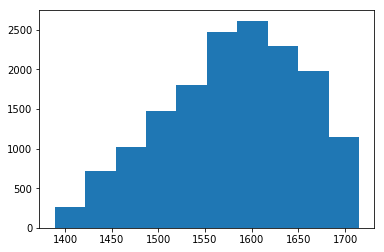

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(birth_year)

(array([ 595., 1469., 1706., 2276., 2245., 2653., 2166., 1769.,  880.,
          42.]),
 array([1500. , 1531.6, 1563.2, 1594.8, 1626.4, 1658. , 1689.6, 1721.2,
        1752.8, 1784.4, 1816. ]),
 <a list of 10 Patch objects>)

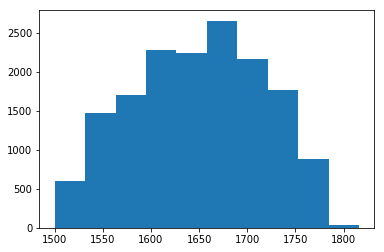

In [8]:
death_year = parse_year(data_6dfb['Extant Death Year'])
plt.hist(death_year)

In [9]:
def check_nans(array):
    return np.array([int(type(i) == str) for i in array])


def parse_gender(array):
    ans = []
    for i in array:
        if i == 'male':
            ans.append(1)
        elif i == 'female':
            ans.append(0)
        else:
            ans.append(0.5)
    return np.array(ans)


has_title = check_nans(data_6dfb.Title)
has_suffix = check_nans(data_6dfb.Suffix)
gender = parse_gender(data_6dfb.Gender)

columns = (has_title, has_suffix, gender, birth_year, death_year)
n_col = len(columns)
matrix = np.vstack(columns)
matrix = (matrix - matrix.mean(axis=1).reshape(n_col, -1)) / matrix.std(axis=1).reshape(n_col, -1)
matrix = matrix.T

In [10]:
matrix.shape

(15801, 5)

In [11]:
matrix += np.random.randn(*matrix.shape) * 1e-4

In [12]:
matrix.mean(axis=0)

array([ 1.43890227e-06,  1.88190210e-07,  5.33943346e-07, -4.58460421e-07,
       -1.12232377e-06])

In [13]:
matrix.std(axis=0)

array([1.00000006, 0.99999992, 0.99999998, 1.0000003 , 0.99999981])

In [14]:
with open("../matrixes/6dfb", "w") as f:
    for row in matrix:
        for elem in row:
            print("%.8f" % elem, end=' ', file=f)
        print(file=f)